### 12304510
## Yuvraj Gupta rollno. 39

In [2]:
#Logistic Regression

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [45]:
print(df.head())
print(df.info())
print(df.describe())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...        1180              0   
1      7242     2.0           0     0  ...        2170            400   
2     10000     1.0           0     0  ...         770              0   
3      5000     1.0           0     0  ...        1050            910   
4      8080     1.0           0     0  ...        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955          

In [5]:
median_price = df['price'].median()
df['price_category'] = np.where(df['price'] > median_price, 1, 0)

In [6]:
X = df.drop(['price', 'price_category', 'id', 'date'], axis=1)
y = df['price_category']

In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [10]:
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:,1]  

In [11]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[1851  285]
 [ 371 1816]]


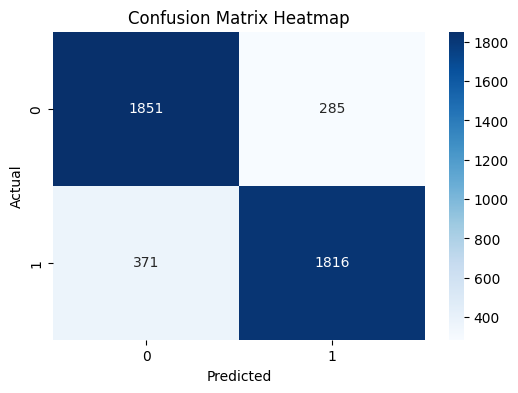

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()

In [13]:
mae = mean_absolute_error(y_test, y_pred_prob)
mse = mean_squared_error(y_test, y_pred_prob)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_prob)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²) Score:", r2)

Accuracy: 84.82535276428406
Mean Absolute Error (MAE): 0.22058653948845974
Mean Squared Error (MSE): 0.10474613088127803
Root Mean Squared Error (RMSE): 0.32364506929857284
R-squared (R²) Score: 0.5809571550251863


In [14]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [16]:
df['price_category'] = pd.qcut(df['price'], q=3, labels=[0, 1, 2])

In [17]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
num_col = num_col.drop('price')

In [18]:
X = df[num_col]
y = df['price_category']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=50)

In [20]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
pred = knn.predict(X_test_scaled)

In [22]:
tab = confusion_matrix(y_test, pred)
print("\nConfusion Matrix:\n", tab)


Confusion Matrix:
 [[1243  210   11]
 [ 261  989  153]
 [  23  294 1139]]


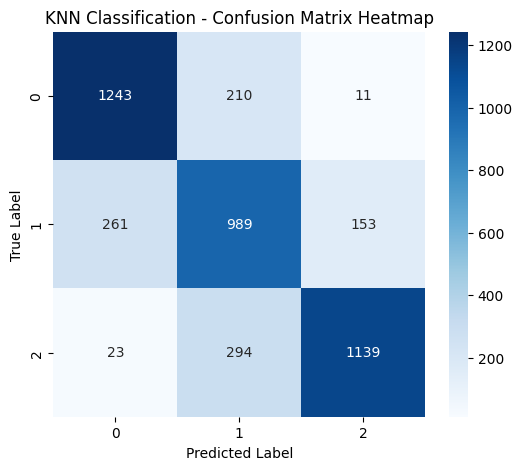

In [23]:
plt.figure(figsize=(6,5))
sns.heatmap(tab, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("KNN Classification - Confusion Matrix Heatmap")
plt.show()

In [24]:
acc = accuracy_score(y_test, pred) * 100
print("ACCURACY IS: {:.2f}%".format(acc))

ACCURACY IS: 77.98%


In [25]:
# Decision Clasification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

In [26]:
df['price_category'] = pd.qcut(df['price'], q=3, labels=[0, 1, 2])

In [27]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
num_col = num_col.drop('price')

In [28]:
X = df[num_col]
y = df['price_category']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

In [30]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
dt = DecisionTreeClassifier(random_state=50, max_depth=5)  
dt.fit(X_train_scaled, y_train)
pred = dt.predict(X_test_scaled)

In [32]:
tab = confusion_matrix(y_test, pred)
print("\nConfusion Matrix:\n", tab)


Confusion Matrix:
 [[1187  223   37]
 [ 264  859  281]
 [  20  250 1202]]


In [33]:
acc = accuracy_score(y_test, pred) * 100
print("ACCURACY IS: {:.2f}%".format(acc))

ACCURACY IS: 75.13%


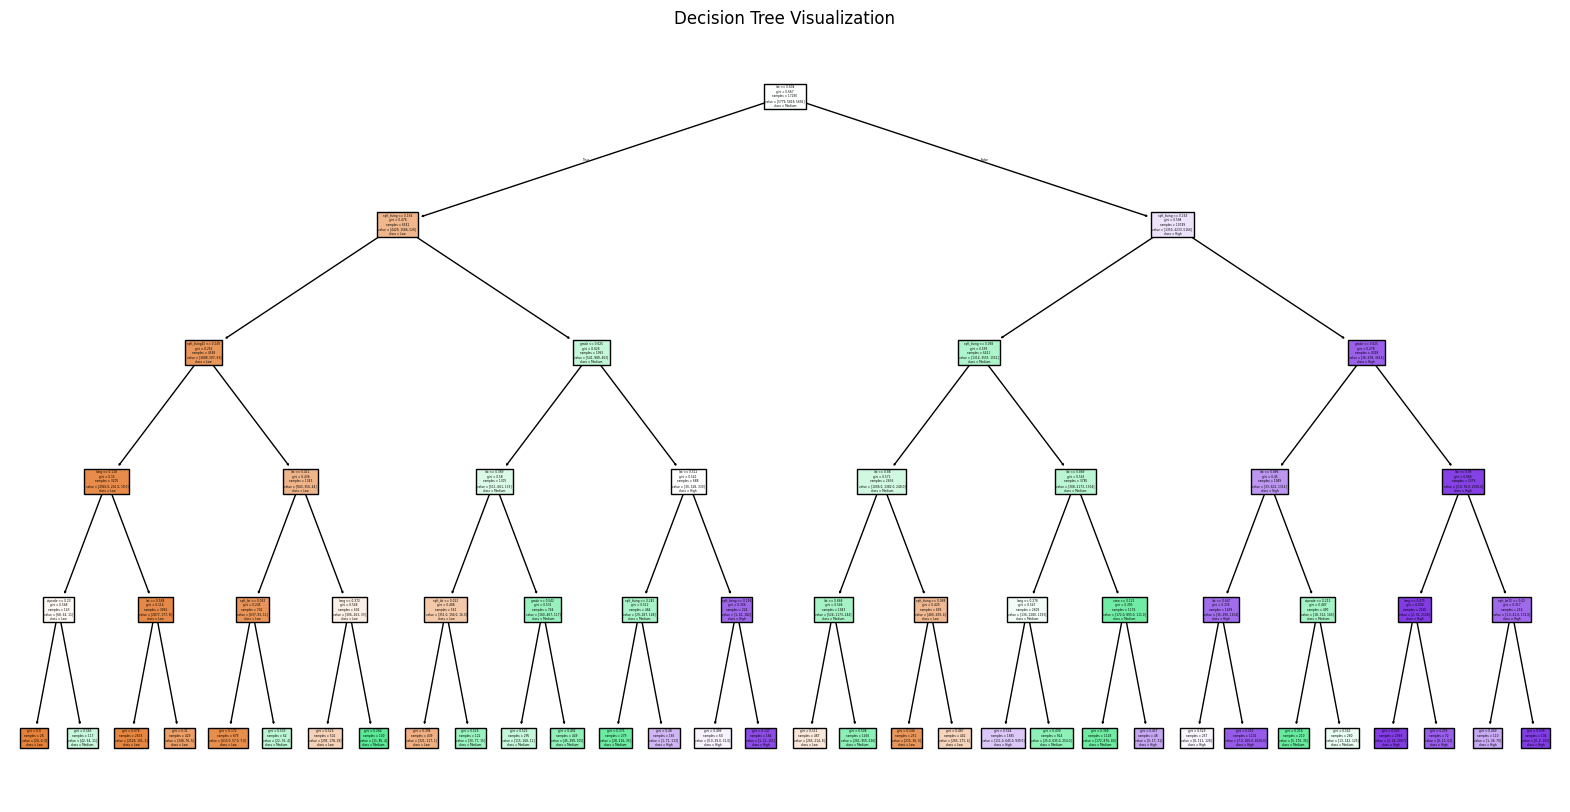

In [34]:
plt.figure(figsize=(20,10))
plot_tree(dt, feature_names=num_col, class_names=['Low','Medium','High'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

In [46]:
# Kmeans
from sklearn.preprocessing import MinMaxScaler   
from sklearn.cluster import KMeans

In [47]:
num_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                'floors', 'waterfront', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'long']

In [48]:
X = df[num_features]

In [49]:
scaler = MinMaxScaler() 
X_scaled = scaler.fit_transform(X)

In [50]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

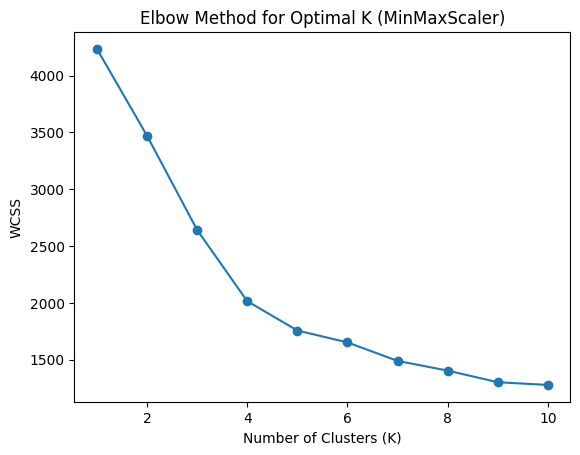

In [51]:
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal K (MinMaxScaler)")
plt.show()

In [52]:
print("WCSS values for each k = 1 to 10:")
for i, val in enumerate(wcss, 1):
    print(f"k = {i}, WCSS = {val}")

WCSS values for each k = 1 to 10:
k = 1, WCSS = 4235.2064906518035
k = 2, WCSS = 3470.9002272930056
k = 3, WCSS = 2641.8468589839667
k = 4, WCSS = 2015.5239067809243
k = 5, WCSS = 1757.4044350544623
k = 6, WCSS = 1652.7304671816128
k = 7, WCSS = 1490.0606737784449
k = 8, WCSS = 1404.5692803536133
k = 9, WCSS = 1302.2714076274683
k = 10, WCSS = 1278.5355280019714
